# Matplotlib -> Seaborn

You can (and often want to) use matplotlib on its own to make pretty plots.

In [1]:
import matplotlib.pyplot as plt

Let's plot some lines

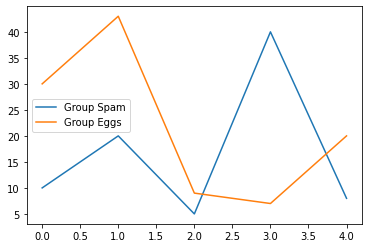

In [5]:
def plot_some_lines():
    plt.figure()
    x1 = [10,20,5,40,8]
    x2 = [30,43,9,7,20]
    plt.plot(x1, label="Group Spam")
    plt.plot(x2, label="Group Eggs")
    plt.legend()
    plt.show()

plot_some_lines()

But may data scientist prefer to use tools which build on Matplotlib, like Seaborn.

In [6]:
import seaborn as sns

## As you will see shortly, Seaborn is such a tool.

Seaborn can pretty up Matplotlib very easily.

In [7]:
sns.set()

Seaborn has taken control of the figure's look.

Now let's show the matplotlib figure again.

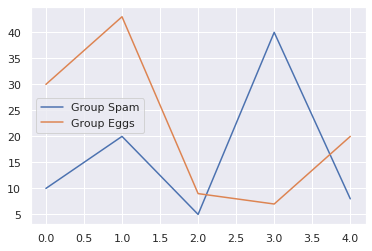

In [8]:
plot_some_lines()

## Seaborn has some very handy data sets built in.

In [9]:
sns.load_dataset?

Signature: sns.load_dataset(name, cache=True, data_home=None, **kws)
Docstring:
Load an example dataset from the online repository (requires internet).

This function provides quick access to a small number of example datasets
that are useful for documenting seaborn or generating reproducible examples
for bug reports. It is not necessary for normal usage.

Note that some of the datasets have a small amount of preprocessing applied
to define a proper ordering for categorical variables.

Use :func:`get_dataset_names` to see a list of available datasets.

Parameters
----------
name : str
    Name of the dataset (``{name}.csv`` on
    https://github.com/mwaskom/seaborn-data).
cache : boolean, optional
    If True, try to load from the local cache first, and save to the cache
    if a download is required.
data_home : string, optional
    The directory in which to cache data; see :func:`get_data_home`.
kws : keys and values, optional
    Additional keyword arguments are passed to passed thr

In [11]:
sns.get_dataset_names()
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


And we can use them just like a dataframe that came from a csv.

,origin,mpg
0,europe,28.411111
1,japan,31.595652
2,usa,27.840278


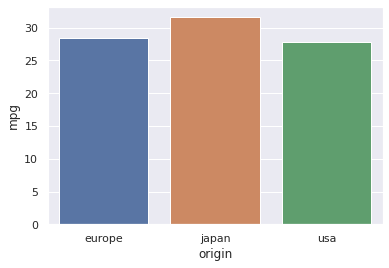

In [30]:
four_cylinders = mpg_df[mpg_df.cylinders == 4]
mpg_by_origin = four_cylinders.groupby('origin', as_index=False).mpg.mean()
sns.barplot(x="origin", y="mpg",data=mpg_by_origin)
mpg_by_origin

<AxesSubplot:xlabel='cylinders', ylabel='count'>

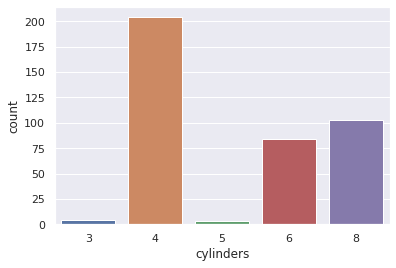

In [31]:
sns.countplot(data=mpg_df, x="cylinders")

Help on function relplot in module seaborn.relational:

relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-spe

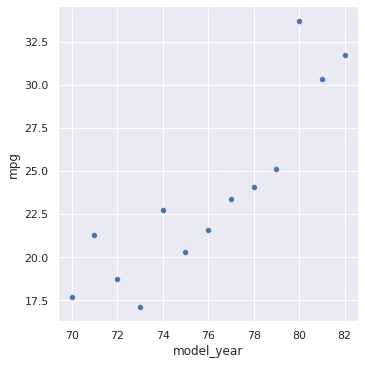

In [34]:
avg_mpg = mpg_df.groupby("model_year", as_index=False).mpg.mean()
sns.relplot(x="model_year",y="mpg",data=avg_mpg)


In [35]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


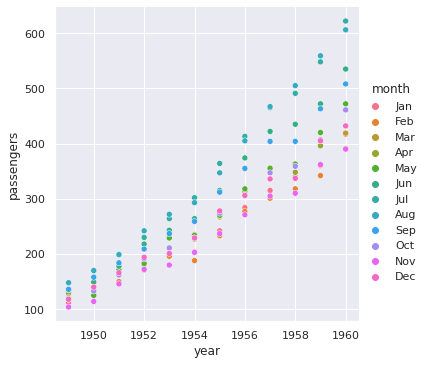

In [36]:
sns.relplot(x="year",y="passengers", hue="month", data=flights)

Let's consolidate the data by combining the months

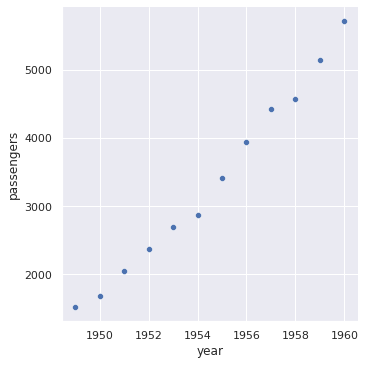

In [41]:
year_sums = flights.groupby("year",as_index=False).sum()
year_sums
sns.relplot(x="year",y="passengers", data=year_sums)

And we can make some predictions

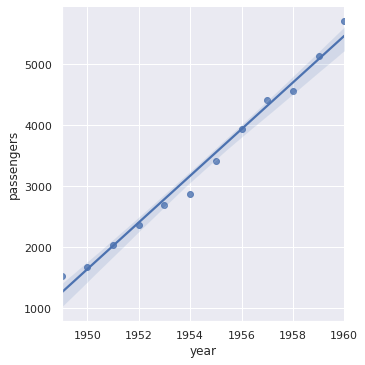

In [45]:
sns.lmplot(x="year", y="passengers", data=year_sums)
# dir(sns)


Apparently more people are flying year over year (unless there's a pandemic)

But do those visualizations best convey that notion?
Or are there better choices available?

How much work would it take to use another type of graph in Seaborn?

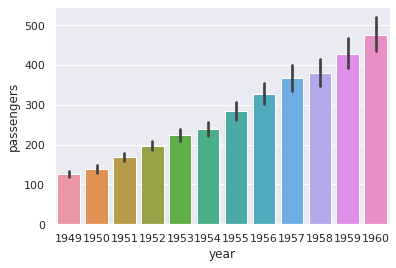

In [46]:
graph = sns.barplot(x="year", y="passengers", data=flights)

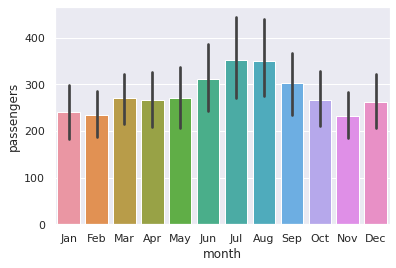

In [47]:
graph = sns.barplot(x="month", y="passengers", data=flights)

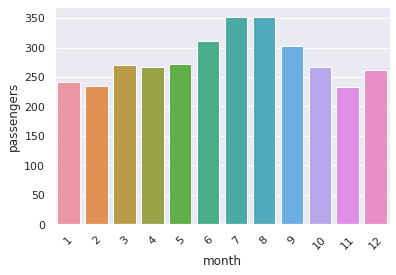

In [52]:
g=sns.barplot(x="month",y="passengers", data=flights, ci=None)

g.set_xticklabels(labels=[1,2,3,4,5,6,7,8,9,10,11,12],rotation=45)
print()